In [1]:
#利用MLP多变量时序预测欺骗干扰
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#导入库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# 导入数据集
#dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
dataset = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/9在第一位.csv')

In [3]:
#将数据集拆分为独立变量和因变量
X = dataset[dataset.columns[:-1]]   #从0到倒数第一列
y = dataset.Jammer                  #只包括data的y这一列

#将数据集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 34)

In [4]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=64)


#数据的标准化
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)
print(type(X_norm))

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)
print(sum(var_ratio))

[[ 0.2266028  -0.17315379  1.19535002 ... -1.6073637   0.
   0.        ]
 [ 1.17040065 -0.17315379  0.99816054 ...  0.00451881  0.
   0.        ]
 [ 0.85580137  0.03599409 -0.28357109 ...  1.94887064  0.
   0.        ]
 ...
 [-0.71719506 -0.17315379  1.19535002 ... -0.01032357  0.
   0.        ]
 [ 0.78332554 -0.09472333 -0.7765448  ...  0.64335934  0.
   0.        ]
 [ 0.62327146 -0.09472333 -0.7765448  ...  0.63977269  0.
   0.        ]]
<class 'numpy.ndarray'>
[2.32843676e+01 3.17428740e+00 3.01956932e+00 2.50713406e+00
 2.08137321e+00 1.90802957e+00 1.71285599e+00 1.56724830e+00
 1.44977822e+00 1.29892912e+00 1.17829178e+00 1.10283446e+00
 1.06893684e+00 1.01099802e+00 9.94435096e-01 8.84767826e-01
 8.62913909e-01 8.15045635e-01 7.33250702e-01 6.96942456e-01
 6.38745402e-01 5.88262320e-01 5.10608746e-01 4.75680299e-01
 4.63147702e-01 4.22253448e-01 3.96779999e-01 3.61726804e-01
 3.42207320e-01 3.25939140e-01 3.07771574e-01 2.82836422e-01
 2.70846805e-01 2.47938086e-01 2.27173420e-0

In [5]:
##可视化方差比例
#fig2 = plt.figure(figsize=(10,5))
#plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14],var_ratio)
##plt.bar([1,2,3,4,5],var_ratio)
#plt.xlabel('Components')
#plt.ylabel('Variance ratio')
#plt.show()

(9679, 25) (9679, 64)
[0.40141314 0.05472344 0.05205616 0.04322198 0.03588204 0.03289366
 0.02952895 0.02701873 0.02499359 0.02239301 0.02031328 0.01901242
 0.01842804 0.0174292  0.01714366 0.01525303 0.01487622 0.01405105
 0.01264093 0.012015   0.01101097 0.01014132 0.0088005  0.0081999
 0.00798335]
<class 'numpy.ndarray'>
0.9313


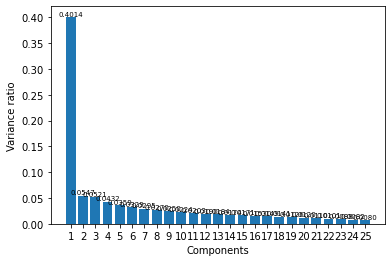

In [6]:
# 训练集数据降维到25维
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape,X_norm.shape)

# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 26))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
                                   "16","17","18","19","20","21","22","23","24","25"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

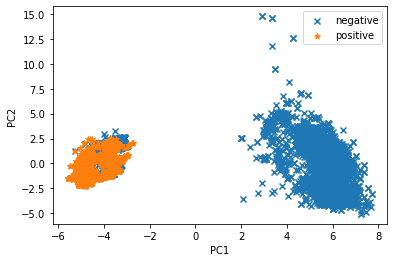

In [7]:
#降维数据的可视化
fig3 = plt.figure()
plt.scatter(X_train_pca[:,0][y_train==0],X_train_pca[:,1][y_train==0],marker='x',label='negative')
plt.scatter(X_train_pca[:,0][y_train==1],X_train_pca[:,1][y_train==1],marker='*',label='positive')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

##确定随机深林数目、建模并调参
##n_estimators是影响程度最大的参数，首先对其进行调整：
#scorel = []
#for i in range(0,200,10):      #从[0,200)只取能被10整除的数
#	#第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何引起模型整体准确率的变化
#    GB = GradientBoostingClassifier(n_estimators=i+1,   #森林里（决策）树的数目。   #criterion: ”gini” or “entropy”(default=”gini”)是计算属性的gini(基尼不纯度)还是entropy(信息增益)，来选择最合适的节点。
#                                    #n_jobs=1,			#用于拟合和预测的并行运行的工作（作业）数量。因为可以并行从而提高性能。1=不并行；n：n个并行；-1：CPU有多少core，就启动多少job
#                                    random_state=90)
#    score = cross_val_score(GB,X_train_pca,y_train,cv=10).mean()    #过传入的模型，训练十次，最后将十次结果求平均值。将每个数据集都算一次
#     #交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
#    scorel.append(score)
#print('最大得分为：{}'.format(max(scorel)))
#a = (scorel.index(max(scorel))*10)+1
#print('子树数量为：{}'.format(a))
#plt.figure(figsize=[20,5])
#plt.plot(range(1,201,10),scorel,color="blue", linewidth=1.5, marker = 'o')
#plt.xlabel("N_estimators")
#plt.ylabel("Score")
#plt.show()

In [9]:
##调参第二步：细化学习曲线    放大部分内容
#scorel = []
#for i in range(155,164):
#    GB = GradientBoostingClassifier(n_estimators=i,
#                                #n_jobs=6,
#                                random_state=90)
#    score = cross_val_score(GB,X_train_pca,y_train,cv=10).mean()
#    scorel.append(score)
#print('最大得分为：{}'.format(max(scorel)))
#a = ([*range(155,164)][scorel.index(max(scorel))])
#print('子树数量为：{}'.format(a))
#plt.figure(figsize=[20,5])
#plt.plot(range(155,164),scorel,color="blue", linewidth=1.5, marker = 'o')
#plt.xlabel("N_estimators")
#plt.ylabel("Score")
#plt.show()

In [10]:
##网格搜索法确定其他参数
##调整max_depth
#param_grid = {'max_depth':np.arange(1, 20, 1)}
#print(" 11 ", param_grid)
# 
#GB = GradientBoostingClassifier(n_estimators=158
#                            ,random_state=98)
#GS = GridSearchCV(GB,param_grid,cv=10)
#GS.fit(X_train_pca,y_train)
#print(GS.best_params_,":",GS.best_score_)

In [11]:
#降维后的模型建立与训练

PCA_GBDT = GradientBoostingClassifier(n_estimators=158, max_depth=5, random_state=98)
PCA_GBDT.fit(X_train_pca,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=158, random_state=98)

In [12]:
#测试集数据降维到25维
pca = PCA(n_components=25)

X_norm = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_norm)

print(X_test_pca)
print(X_test_pca.shape)

[[-4.11768865  0.56050599  2.66810283 ... -0.14675298  0.48069835
   0.61510248]
 [-3.62316799  1.88929939 -2.065761   ... -0.70635898  0.11336848
   0.09178786]
 [-4.84847963 -2.58845137  1.60933015 ... -0.22692074 -0.04268623
  -0.46417585]
 ...
 [ 6.37271318  1.52414741  0.78409312 ...  0.66593177 -0.26854892
  -1.3120912 ]
 [ 5.60656643 -2.96469302 -2.59513591 ... -0.03169229  0.30538819
   0.10904158]
 [-5.11867692 -2.45792209  2.18398342 ... -0.18359853  0.21602587
   0.76971459]]
(4149, 25)


In [13]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict_pca = PCA_GBDT.predict(X_test_pca)
print(y_predict_pca)
print(y_predict_pca.shape)
accuracy_pca = accuracy_score(y_test,y_predict_pca)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(y_test,y_predict_pca)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(y_test,y_predict_pca)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(y_test,y_predict_pca)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

[0 1 1 ... 0 0 1]
(4149,)
PCA测试集准确率: 0.9455


PCA测试集精确率: 0.9686


PCA测试集召回率: 0.9225


PCA测试集F1值: 0.9450


In [14]:
#制作PCA混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_pca)
print(cm)

[[1982   63]
 [ 163 1941]]


In [15]:
#从混淆矩阵中寻找准确性。
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('正确预测值的数量: ', corrPred)
print('错误预测值的数量: ', falsePred)
#print ('\n\nKNN分类器的准确率为: ', corrPred/(cm.sum()))

正确预测值的数量:  3923
错误预测值的数量:  226


In [16]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test, y_predict_pca,digits=4))

              precision    recall  f1-score   support

           0     0.9240    0.9692    0.9461      2045
           1     0.9686    0.9225    0.9450      2104

    accuracy                         0.9455      4149
   macro avg     0.9463    0.9459    0.9455      4149
weighted avg     0.9466    0.9455    0.9455      4149



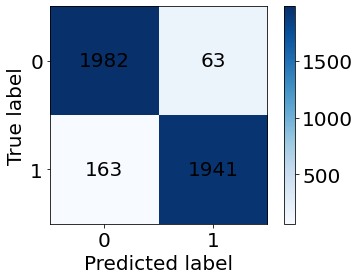

In [17]:
classes = list(set(y))
classes.sort()
confusion = confusion_matrix(y_predict_pca, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes, fontsize=20)
plt.yticks(indices, classes, fontsize=20)
plt.colorbar().ax.tick_params(labelsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],
                 va='center', ha='center',fontsize=20, )

plt.show()

In [18]:
# K折交叉验证模块 
from sklearn.model_selection import cross_val_score 
#使用K折交叉验证模块  
#scores = cross_val_score(nvclassifier, X_test, y_test, cv=10, scoring='accuracy')  
scores = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='accuracy')  

scores = np.around(scores,decimals=4)

#将10次的预测准确率打印出  
print('10折交叉验证准确率：',scores)  
# [0.92 1.   0.83 0.88 0.91 0.96 1.   1.   0.78 0.74]
#将10次的预测准确平均率打印出0.901630434782608  

scoresmean = np.around(scores.mean(),decimals=4)

print('\n\n10折交叉验证平均准确率：',scoresmean)

10折交叉验证准确率： [0.9952 1.     0.9976 0.9904 0.9952 0.9952 0.988  0.988  0.9976 0.9831]


10折交叉验证平均准确率： 0.993


In [19]:
precision = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='precision') 

precision = np.around(precision,decimals=4)

print('10折交叉验证精确率：',precision)

precisionmean = np.around(precision.mean(),decimals=4)

print('\n\n10折交叉验证平均精确率：',precisionmean)

10折交叉验证精确率： [0.9952 1.     0.9953 0.9952 0.9952 1.     0.9952 0.9858 0.9953 0.9856]


10折交叉验证平均精确率： 0.9943


In [20]:
recall = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='recall') 

recall = np.around(recall,decimals=4)

print('10折交叉验证精确率：',recall)

recallmean = np.around(recall.mean(),decimals=4)

print('\n\n10折交叉验证平均召回率：',recallmean)

10折交叉验证精确率： [0.9952 1.     1.     0.9857 0.9952 0.9905 0.981  0.9905 1.     0.981 ]


10折交叉验证平均召回率： 0.9919


In [21]:
f1 = cross_val_score(PCA_GBDT, X_test_pca, y_test, cv=10,scoring='f1') 

f1 = np.around(f1,decimals=4)

print('10折交叉验证f1值：',f1)

f1mean = np.around(f1.mean(),decimals=4)

print('\n\n10折交叉验证平均f1值：',f1mean)

10折交叉验证f1值： [0.9952 1.     0.9976 0.9904 0.9952 0.9952 0.9881 0.9882 0.9976 0.9833]


10折交叉验证平均f1值： 0.9931


In [22]:
roc_auc = cross_val_score(PCA_GBDT,  X_test_pca, y_test, cv=10,scoring='roc_auc') 

roc_auc = np.around(roc_auc,decimals=4)

print('10折交叉验证roc_auc值：',roc_auc)

roc_auc = np.around(roc_auc.mean(),decimals=4)

print('\n\n10折交叉验证平均ROC_AUC值：',roc_auc.mean())

10折交叉验证roc_auc值： [1.     1.     1.     0.999  0.9996 1.     0.9997 0.999  1.     0.9989]


10折交叉验证平均ROC_AUC值： 0.9996


[0 1]


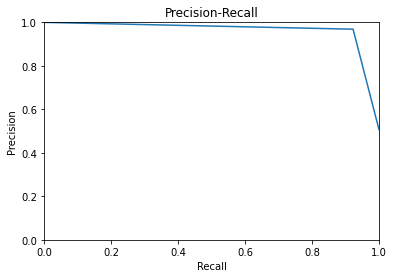

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, y_predict_pca) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()